In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
comps = pd.read_csv('meta_data/Competitions.csv')
tags = pd.read_csv('meta_data/CompetitionTags.csv')

In [4]:
comps.shape

(5576, 42)

In [5]:
comps.columns

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'LeaderboardDisplayFormat', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes',
       'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions', 'ValidationSetName',
       'ValidationSetValue', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'HostName', 'CompetitionTypeId'],
     

In [5]:
comps.isna().sum()

Id                                     0
Slug                                   0
Title                                  0
Subtitle                               3
HostSegmentTitle                       0
ForumId                                0
OrganizationId                      5157
EnabledDate                            0
DeadlineDate                           0
ProhibitNewEntrantsDeadlineDate     5268
TeamMergerDeadlineDate              5274
TeamModelDeadlineDate               5338
ModelSubmissionDeadlineDate         5562
FinalLeaderboardHasBeenVerified        0
HasKernels                             0
OnlyAllowKernelSubmissions             0
HasLeaderboard                         0
LeaderboardPercentage                  0
LeaderboardDisplayFormat               0
EvaluationAlgorithmAbbreviation        1
EvaluationAlgorithmName                1
EvaluationAlgorithmDescription        17
EvaluationAlgorithmIsMax               1
MaxDailySubmissions                    0
NumScoredSubmiss

In [6]:
comps[comps.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Kaggle comp we are looking at, used to verify stuff.

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
4001,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,True,1305,1786,32307,NaN,NaN,False,False,NaN,1


In [6]:
j_df = pd.merge(comps, tags, left_on='Id', right_on='CompetitionId', how='inner', validate='m:m')
j_df.shape #There are a considerable number of untagged competitions...

(793, 45)

In [7]:
j_df[j_df.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Expect 2: image, multilabel classification
#There is a third tag online, but this seems to be a non-standard one, and doesn't appear.

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
595,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,32307,NaN,NaN,False,False,NaN,1,829,26680,14102
596,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,32307,NaN,NaN,False,False,NaN,1,830,26680,16636


In [8]:
j_df[j_df.Title=='RSNA 2022 Cervical Spine Fracture Detection'] #expect 3 tags: image, binary classification, computervision

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
720,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,1023,36363,13207
721,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,994,36363,14102
722,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,995,36363,14201


In [9]:
j_df[j_df.Title=='Data Science Bowl 2017'] #image comp that is not a code comp. tags: image, binaryclassification, healthcare

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
186,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,96,6004,4202
187,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,94,6004,14102
188,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,97,6004,14201


So tag 14102 is for image competitions as it is present in all of these cases

In [48]:
image = j_df[j_df.TagId==14102].copy().reset_index(drop=True)
image.shape #108 image-tagged competitions

(108, 45)

In [49]:
image[image.OnlyAllowKernelSubmissions].DeadlineDate    ## Is a kernal only the same as a code competition? 

47     04/10/2019 01:09:00
49     06/10/2019 22:09:06
51     07/08/2019 23:59:00
54     02/18/2021 23:59:00
55     10/24/2019 23:59:00
60     09/07/2019 23:59:00
61     03/16/2020 23:59:00
64     12/17/2019 23:59:00
65     05/11/2020 23:59:00
67     07/22/2020 23:59:00
70     09/29/2020 23:59:00
71     08/17/2020 23:59:00
72     08/19/2020 01:59:00
73     11/25/2020 23:59:00
76     10/06/2020 23:59:00
77     10/26/2020 23:59:00
80     05/10/2021 23:59:00
81     05/11/2021 23:59:00
82     03/16/2021 23:59:00
83     05/10/2021 23:59:00
86     01/14/2022 23:59:00
88     05/26/2021 23:59:00
89     05/26/2021 23:59:00
90     08/09/2021 23:59:00
91     07/14/2022 23:59:00
92     10/15/2021 23:59:00
94     10/01/2021 23:59:00
95     10/01/2021 23:59:00
96     12/30/2021 23:59:00
97     02/14/2022 23:59:00
102    09/22/2022 23:59:00
103    06/02/2022 23:59:00
104    05/30/2022 23:59:00
105    10/27/2022 23:59:00
106    10/10/2022 23:59:00
107    10/05/2022 23:59:00
Name: DeadlineDate, dtype: o

In [50]:
comps[comps.Title=='Quora Insincere Questions Classification'].OnlyAllowKernelSubmissions 
#The first one here is the example comp linked to Code comps in their FAQ,
# which uses the term 'kernel' rather than notebook. It finished in early-2019, so 4 years ago.

1087     True
3239    False
Name: OnlyAllowKernelSubmissions, dtype: bool

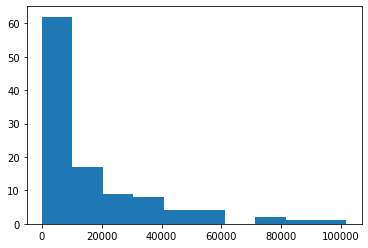

In [51]:
plt.hist(image.TotalSubmissions);

In [52]:
image.TotalSubmissions.describe()

count       108.000000
mean      15575.370370
std       19993.616981
min          27.000000
25%        1703.000000
50%        7184.000000
75%       21066.500000
max      101845.000000
Name: TotalSubmissions, dtype: float64

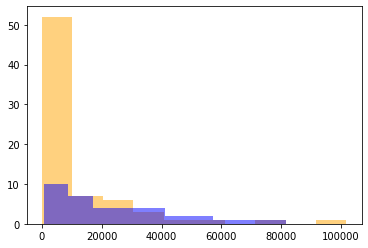

In [53]:
plt.hist(image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions, alpha=0.5, bins=10, color='orange')
plt.hist(image[image.OnlyAllowKernelSubmissions].TotalSubmissions, alpha=0.5, bins=10, color='blue');
#Not sure this is meaningful actually.

In [54]:
image[image.OnlyAllowKernelSubmissions].TotalSubmissions.describe()

count       36.000000
mean     24894.416667
std      20839.013687
min        767.000000
25%       8584.500000
50%      18920.500000
75%      39087.250000
max      81524.000000
Name: TotalSubmissions, dtype: float64

In [55]:
image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions.describe()

count        72.000000
mean      10915.847222
std       17952.918924
min          27.000000
25%         753.250000
50%        4374.000000
75%       11217.250000
max      101845.000000
Name: TotalSubmissions, dtype: float64

In [56]:
image['subs_per_team'] = image.TotalSubmissions/image.TotalTeams

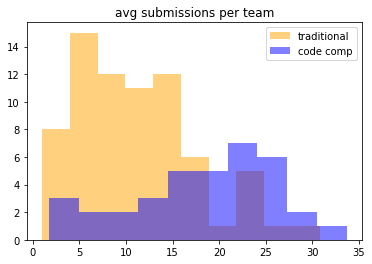

In [57]:
plt.hist(image[image.OnlyAllowKernelSubmissions==False].subs_per_team, alpha=0.5, bins=10, color='orange',label='traditional')
plt.hist(image[image.OnlyAllowKernelSubmissions].subs_per_team, alpha=0.5, bins=10, color='blue', label='code comp')
plt.title('avg submissions per team')
plt.legend();

In [65]:
ccomps = image[image.OnlyAllowKernelSubmissions].copy().reset_index(drop=True)

In [66]:
ccomps[['TotalSubmissions', 'subs_per_team', 'TotalTeams']]

,TotalSubmissions,subs_per_team,TotalTeams
0,3136,1.753915,1788
1,767,1.735294,442
2,6776,5.549550,1221
3,81524,20.903590,3900
4,51874,21.373712,2427
5,71433,24.396516,2928
6,38927,18.905780,2059
7,11077,9.139439,1212
8,10387,12.248821,848
9,19723,19.527723,1010


In [67]:
ccomps.TotalSubmissions.describe()

count       36.000000
mean     24894.416667
std      20839.013687
min        767.000000
25%       8584.500000
50%      18920.500000
75%      39087.250000
max      81524.000000
Name: TotalSubmissions, dtype: float64

In [70]:
ccomps.subs_per_team.describe()

count    36.000000
mean     18.075550
std       7.912399
min       1.735294
25%      13.036124
50%      20.030006
75%      23.168972
max      33.674894
Name: subs_per_team, dtype: float64

In [74]:
ccomps.TotalTeams.describe()

count      36.000000
mean     1336.972222
std       896.393520
min        82.000000
25%       751.750000
50%      1187.500000
75%      1753.500000
max      3900.000000
Name: TotalTeams, dtype: float64

In [68]:
ccomps[ccomps.TotalSubmissions==max(ccomps.TotalSubmissions)]

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId,subs_per_team
3,13836,cassava-leaf-disease-classification,Cassava Leaf Disease Classification,Identify the type of disease present on a Cass...,Research,1000771,3758.0,11/19/2020 21:12:46,02/18/2021 23:59:00,02/11/2021 23:59:00,...,NaN,NaN,False,False,NaN,1,754,13836,14102,20.90359


In [69]:
ccomps[ccomps.subs_per_team==max(ccomps.subs_per_team)]

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId,subs_per_team
30,34547,hubmap-organ-segmentation,HuBMAP + HPA - Hacking the Human Body,Segment multi-organ functional tissue units,Research,1960467,3808.0,06/22/2022 18:34:11,09/22/2022 23:59:00,09/15/2022 23:59:00,...,NaN,NaN,False,False,NaN,1,980,34547,14102,33.674894
